In [46]:
import pandas as pd
import numpy as np 
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load the CSV file (update the path if necessary)
df = pd.read_csv("Resources/amazon_sale_report.csv", low_memory=False)  # Ensure the correct path

# Clean the data: Convert 'Date' column and drop missing 'Amount'
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df_cleaned = df.dropna(subset=['Date', 'Amount'])  # Clean invalid dates and amounts
df_cleaned.set_index('Date', inplace=True)

# Aggregate revenue by month
monthly_revenue = df_cleaned.resample('M')['Amount'].sum()

# Fit the ARIMA model for monthly revenue forecasting
try:
    model = ARIMA(monthly_revenue, order=(1, 1, 1))  # Configure (p, d, q) parameters
    model_fit = model.fit()

    # Print the model summary
    print(model_fit.summary())

    # Forecast the next 12 months of revenue
    forecast = model_fit.forecast(steps=12)  # 12 months into the future
    print("12-Month Revenue Forecast:")
    print(forecast)

except Exception as e:
    print(f"Error: {e}")

                               SARIMAX Results                                
Dep. Variable:                 Amount   No. Observations:                    4
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -54.241
Date:                Mon, 21 Oct 2024   AIC                            114.481
Time:                        19:43:18   BIC                            111.777
Sample:                    03-31-2022   HQIC                           109.046
                         - 06-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6503      4.035      0.161      0.872      -7.258       8.559
ma.L1         -0.9999      1.954     -0.512      0.609      -4.830       2.831
sigma2      1.648e+14   1.19e-14   1.39e+28      0.0

C:\Users\44rul\AppData\Local\Temp\ipykernel_13976\3808642368.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
C:\Users\44rul\AppData\Local\Temp\ipykernel_13976\3808642368.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = df_cleaned.resample('M')['Amount'].sum()
C:\Users\44rul\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\44rul\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3158: UserWarning: Early subset of data for variable 0 has too few non-missing obser

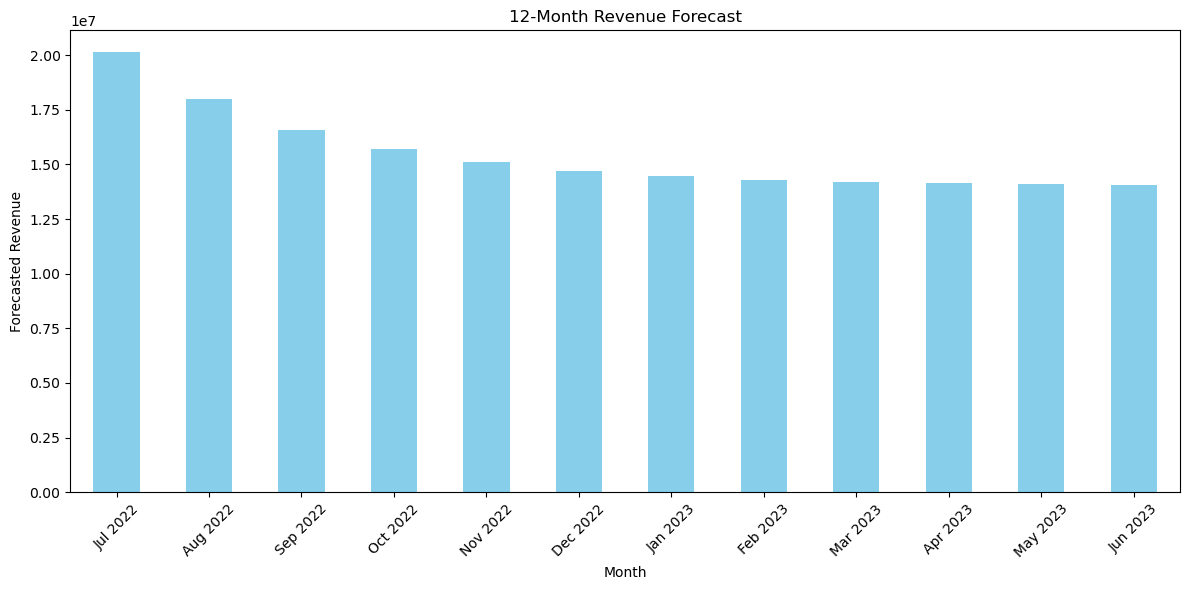

In [47]:
# Plot forecast as a bar chart
forecast.plot(kind='bar', legend=False, figsize=(12, 6), color='skyblue')

# Set x-ticks and labels properly
plt.xticks(ticks=range(12), labels=forecast_index.strftime('%b %Y'), rotation=45)
plt.title('12-Month Revenue Forecast')
plt.xlabel('Month')
plt.ylabel('Forecasted Revenue')
plt.tight_layout()

# Display the plot
plt.show()


In [48]:
df = df.dropna(subset=['ship-state'])  # Drop rows with missing ship-state
df['ship-state'] = df['ship-state'].astype('category')

In [49]:
df.rename(columns= {'ship-state': 'State'}, inplace=True)

In [50]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Create the 'delivery_time' column by subtracting the shipping date from a fixed delivery date
df['delivery_time'] = (pd.to_datetime('2022-05-01') - df['Date']).dt.days

# Fit the ANOVA model
model = ols('(delivery_time) ~ C(State)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                sum_sq        df         F        PR(>F)
C(State)  2.535298e+05      68.0  5.626909  2.742017e-45
Residual  8.539100e+07  128873.0       NaN           NaN
